## 1. 📚 Importation des Bibliothèques

Installation et importation de toutes les bibliothèques nécessaires pour le machine learning.

In [1]:
# Installation des packages nécessaires (décommenter si besoin)
# !pip install xgboost scikit-learn pandas numpy matplotlib seaborn plotly

# Importation des bibliothèques principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance

# Autres
import warnings
warnings.filterwarnings('ignore')

# Configuration pour l'affichage
%matplotlib inline
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Toutes les bibliothèques ont été importées avec succès!")
print(f"📦 Version XGBoost: {xgb.__version__}")
print(f"📦 Version Pandas: {pd.__version__}")
print(f"📦 Version NumPy: {np.__version__}")

✅ Toutes les bibliothèques ont été importées avec succès!
📦 Version XGBoost: 3.0.2
📦 Version Pandas: 2.2.3
📦 Version NumPy: 2.2.6


## 2. 📊 Chargement et Exploration des Données

Chargement du dataset généré et analyse exploratoire initiale.

In [2]:
# Chargement du dataset

# Essayer de charger depuis le dossier data
df = pd.read_csv('../data/radio_dataset_notebook.csv')
print("✅ Dataset chargé depuis ../data/radio_dataset_notebook.csv")


# Informations générales
print(f"\n📋 Informations du dataset:")
print(f"   - Taille: {df.shape[0]} lignes, {df.shape[1]} colonnes")
print(f"   - Colonnes: {list(df.columns)}")
print(f"   - Mémoire: {df.memory_usage(deep=True).sum() / 1024:.1f} KB")

# Affichage des premières lignes
print(f"\n📊 Aperçu des données:")
display(df.head())

# Statistiques descriptives
print(f"\n📈 Statistiques descriptives:")
display(df.describe())

# Vérification des valeurs manquantes
print(f"\n🔍 Valeurs manquantes:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "Aucune valeur manquante ✅")

# Types de données
print(f"\n📝 Types de données:")
print(df.dtypes)

✅ Dataset chargé depuis ../data/radio_dataset_notebook.csv

📋 Informations du dataset:
   - Taille: 10000 lignes, 5 colonnes
   - Colonnes: ['distance', 'numwall', 'etage', 'frequence', 'pathloss']
   - Mémoire: 390.8 KB

📊 Aperçu des données:


,distance,numwall,etage,frequence,pathloss
0,18.13,3,0,4993.1,156.33
1,43.09,3,0,1838.4,152.20
2,14.78,1,1,1704.3,141.74
3,5.89,2,0,2329.4,124.47
4,13.43,0,0,5774.2,149.79



📈 Statistiques descriptives:


,distance,numwall,etage,frequence,pathloss
count,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,16.706099,2.22890,0.68280,3162.922130,153.267928
std,14.948604,2.01874,0.86779,1597.357515,27.500113
min,0.500000,0.00000,0.00000,800.000000,75.720000
25%,7.060000,1.00000,0.00000,2217.600000,133.052500
50%,12.095000,2.00000,0.00000,2415.700000,149.405000
75%,21.010000,3.00000,1.00000,4985.900000,170.200000
max,100.000000,10.00000,4.00000,5956.900000,265.070000



🔍 Valeurs manquantes:
Aucune valeur manquante ✅

📝 Types de données:
distance     float64
numwall        int64
etage          int64
frequence    float64
pathloss     float64
dtype: object


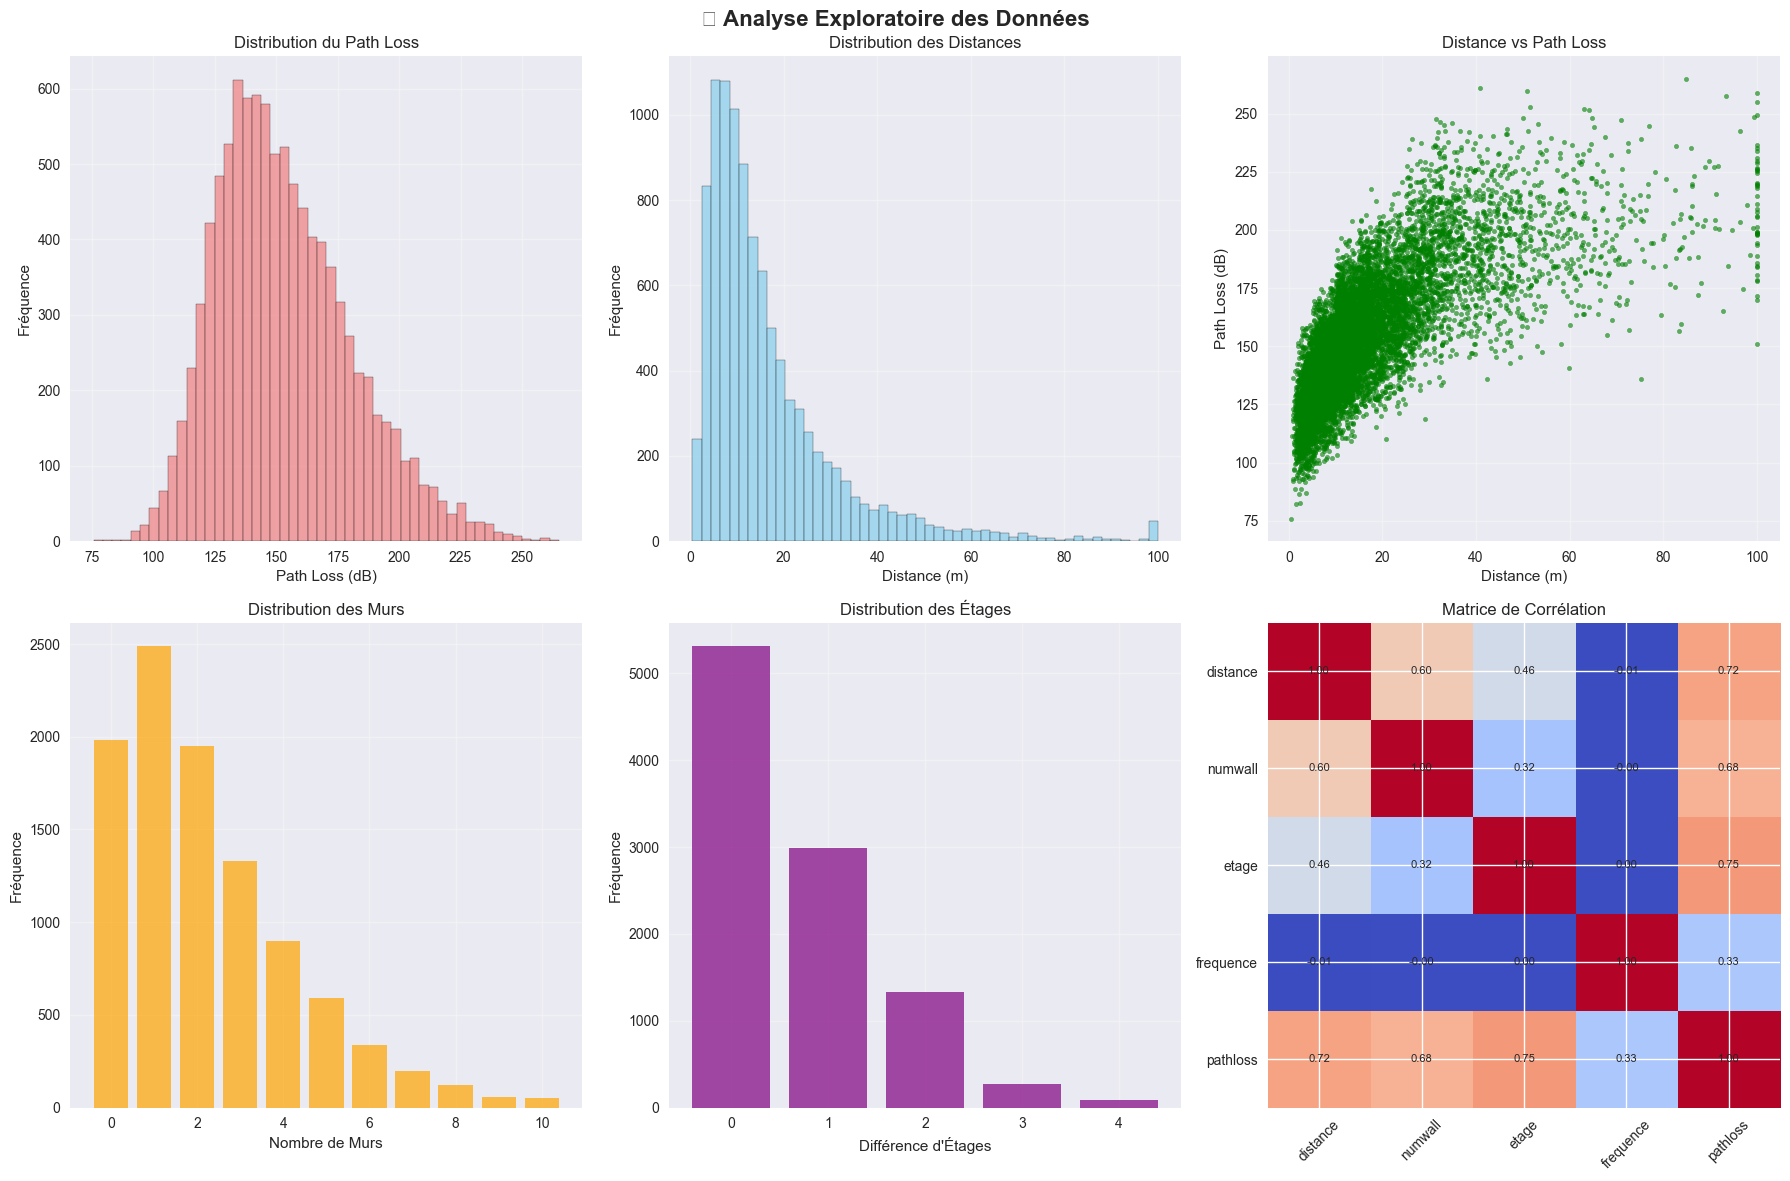

🔗 Corrélations avec la variable cible (pathloss):
   etage: 0.749
   distance: 0.721
   numwall: 0.682
   frequence: 0.333


In [3]:
# Visualisations exploratoires
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('🔍 Analyse Exploratoire des Données', fontsize=16, fontweight='bold')

# Distribution de la variable cible (pathloss)
axes[0,0].hist(df['pathloss'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,0].set_xlabel('Path Loss (dB)')
axes[0,0].set_ylabel('Fréquence')
axes[0,0].set_title('Distribution du Path Loss')
axes[0,0].grid(True, alpha=0.3)

# Distribution des distances
axes[0,1].hist(df['distance'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,1].set_xlabel('Distance (m)')
axes[0,1].set_ylabel('Fréquence')
axes[0,1].set_title('Distribution des Distances')
axes[0,1].grid(True, alpha=0.3)

# Relation Distance vs Path Loss
axes[0,2].scatter(df['distance'], df['pathloss'], alpha=0.6, s=10, color='green')
axes[0,2].set_xlabel('Distance (m)')
axes[0,2].set_ylabel('Path Loss (dB)')
axes[0,2].set_title('Distance vs Path Loss')
axes[0,2].grid(True, alpha=0.3)

# Distribution des murs
wall_counts = df['numwall'].value_counts().sort_index()
axes[1,0].bar(wall_counts.index, wall_counts.values, alpha=0.7, color='orange')
axes[1,0].set_xlabel('Nombre de Murs')
axes[1,0].set_ylabel('Fréquence')
axes[1,0].set_title('Distribution des Murs')
axes[1,0].grid(True, alpha=0.3)

# Distribution des étages
floor_counts = df['etage'].value_counts().sort_index()
axes[1,1].bar(floor_counts.index, floor_counts.values, alpha=0.7, color='purple')
axes[1,1].set_xlabel('Différence d\'Étages')
axes[1,1].set_ylabel('Fréquence')
axes[1,1].set_title('Distribution des Étages')
axes[1,1].grid(True, alpha=0.3)

# Matrice de corrélation
correlation_matrix = df.corr()
im = axes[1,2].imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
axes[1,2].set_xticks(range(len(correlation_matrix.columns)))
axes[1,2].set_yticks(range(len(correlation_matrix.columns)))
axes[1,2].set_xticklabels(correlation_matrix.columns, rotation=45)
axes[1,2].set_yticklabels(correlation_matrix.columns)
axes[1,2].set_title('Matrice de Corrélation')

# Ajouter les valeurs dans la matrice
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        axes[1,2].text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                      ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Affichage des corrélations importantes
print("🔗 Corrélations avec la variable cible (pathloss):")
correlations = df.corr()['pathloss'].sort_values(ascending=False)
for var, corr in correlations.items():
    if var != 'pathloss':
        print(f"   {var}: {corr:.3f}")

## 3. 🔧 Préparation des Données

Préparation des features et de la variable cible pour l'entraînement du modèle.

In [4]:
# Définition des features et de la variable cible
feature_columns = ['distance', 'numwall', 'etage', 'frequence']
target_column = 'pathloss'

# Séparation des features (X) et de la variable cible (y)
X = df[feature_columns].copy()
y = df[target_column].copy()

print(f"📊 Forme des données:")
print(f"   Features (X): {X.shape}")
print(f"   Target (y): {y.shape}")

print(f"\n📋 Features utilisées:")
for i, col in enumerate(feature_columns):
    print(f"   {i+1}. {col}")

# Vérification des valeurs aberrantes (outliers)
print(f"\n🔍 Détection des valeurs aberrantes (méthode IQR):")
outliers_info = {}

for col in X.columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = X[(X[col] < lower_bound) | (X[col] > upper_bound)]
    outliers_info[col] = len(outliers)
    
    print(f"   {col}: {len(outliers)} outliers ({len(outliers)/len(X)*100:.1f}%)")

# Division train/validation/test
print(f"\n🔄 Division des données:")
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.18, random_state=42)

print(f"   Train: {X_train.shape[0]} échantillons ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Validation: {X_val.shape[0]} échantillons ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"   Test: {X_test.shape[0]} échantillons ({X_test.shape[0]/len(X)*100:.1f}%)")

# Statistiques des ensembles
print(f"\n📈 Statistiques des ensembles:")
print(f"   Train - Path Loss moyen: {y_train.mean():.2f} ± {y_train.std():.2f} dB")
print(f"   Val   - Path Loss moyen: {y_val.mean():.2f} ± {y_val.std():.2f} dB")
print(f"   Test  - Path Loss moyen: {y_test.mean():.2f} ± {y_test.std():.2f} dB")

# Sauvegarde des ensembles pour référence
datasets_info = {
    'train_size': len(X_train),
    'val_size': len(X_val),
    'test_size': len(X_test),
    'features': feature_columns,
    'target': target_column
}

print(f"\n✅ Données préparées avec succès!")

📊 Forme des données:
   Features (X): (10000, 4)
   Target (y): (10000,)

📋 Features utilisées:
   1. distance
   2. numwall
   3. etage
   4. frequence

🔍 Détection des valeurs aberrantes (méthode IQR):
   distance: 649 outliers (6.5%)
   numwall: 425 outliers (4.2%)
   etage: 360 outliers (3.6%)
   frequence: 0 outliers (0.0%)

🔄 Division des données:
   Train: 6970 échantillons (69.7%)
   Validation: 1530 échantillons (15.3%)
   Test: 1500 échantillons (15.0%)

📈 Statistiques des ensembles:
   Train - Path Loss moyen: 153.11 ± 27.42 dB
   Val   - Path Loss moyen: 154.00 ± 26.73 dB
   Test  - Path Loss moyen: 153.27 ± 28.64 dB

✅ Données préparées avec succès!


## 4. 🚀 Entraînement du Modèle XGBoost de Base

Entraînement initial avec les paramètres par défaut pour établir une baseline.

🚀 Entraînement du modèle XGBoost de base...

📊 Performance du modèle de base:
   Train:
      RMSE: 3.501 dB
      MAE:  2.722 dB
      R²:   0.984
   Validation:
      RMSE: 5.488 dB
      MAE:  4.356 dB
      R²:   0.958
   Test:
      RMSE: 5.438 dB
      MAE:  4.269 dB
      R²:   0.964


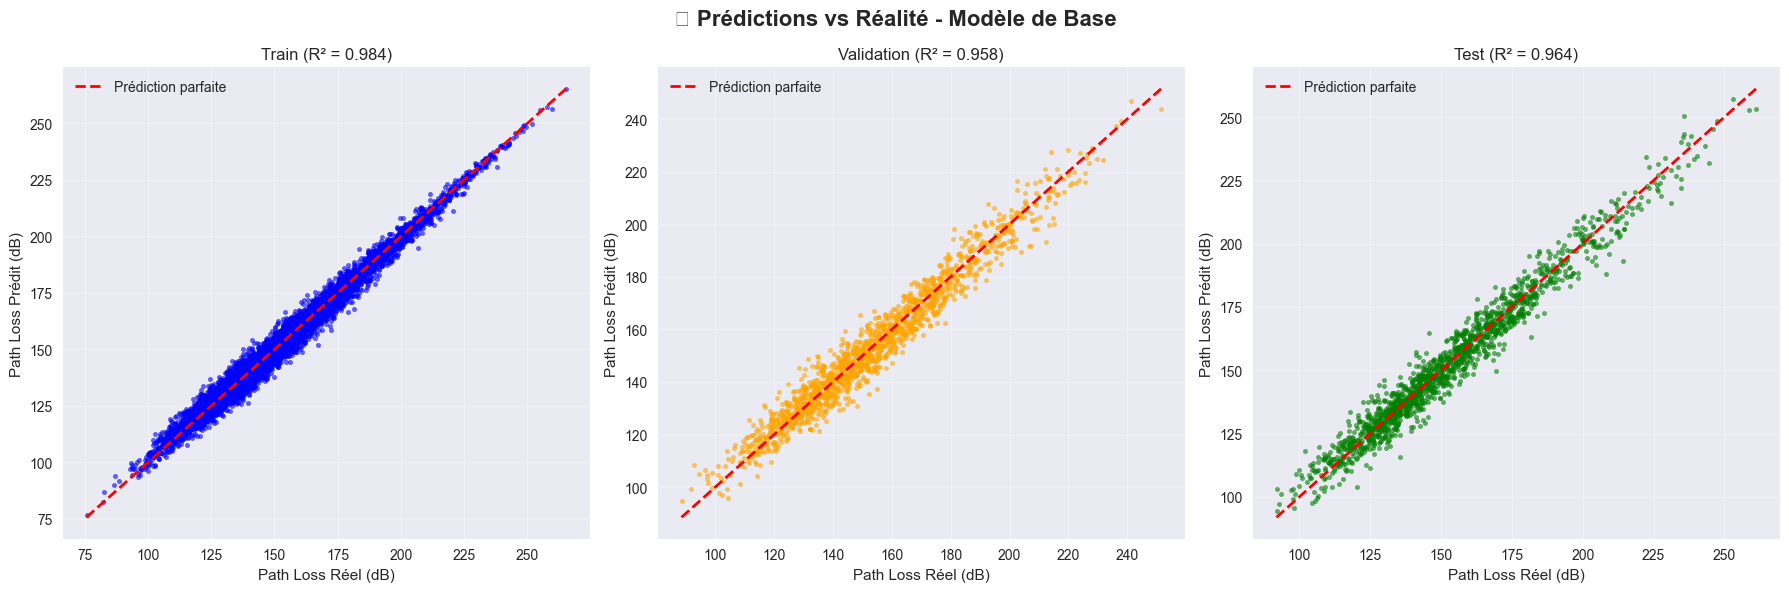


✅ Modèle de base entraîné avec succès!


In [6]:
# Création et entraînement du modèle XGBoost de base
print("🚀 Entraînement du modèle XGBoost de base...")

# Modèle avec paramètres par défaut
xgb_base = xgb.XGBRegressor(
    random_state=42,
    n_estimators=100,
    eval_metric='rmse'
)

# Entraînement
xgb_base.fit(X_train, y_train)

# Prédictions sur tous les ensembles
y_train_pred_base = xgb_base.predict(X_train)
y_val_pred_base = xgb_base.predict(X_val)
y_test_pred_base = xgb_base.predict(X_test)

# Calcul des métriques
def calculate_metrics(y_true, y_pred, set_name):
    """Calcule et affiche les métriques de performance"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"   {set_name}:")
    print(f"      RMSE: {rmse:.3f} dB")
    print(f"      MAE:  {mae:.3f} dB")
    print(f"      R²:   {r2:.3f}")
    
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2}

print(f"\n📊 Performance du modèle de base:")
base_metrics = {}
base_metrics['train'] = calculate_metrics(y_train, y_train_pred_base, "Train")
base_metrics['val'] = calculate_metrics(y_val, y_val_pred_base, "Validation")
base_metrics['test'] = calculate_metrics(y_test, y_test_pred_base, "Test")

# Visualisation des prédictions vs réalité
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('🎯 Prédictions vs Réalité - Modèle de Base', fontsize=16, fontweight='bold')

datasets = [
    (y_train, y_train_pred_base, 'Train', 'blue'),
    (y_val, y_val_pred_base, 'Validation', 'orange'),
    (y_test, y_test_pred_base, 'Test', 'green')
]

# Mapping from display name to base_metrics key
metrics_key_map = {'Train': 'train', 'Validation': 'val', 'Test': 'test'}

for i, (y_true, y_pred, name, color) in enumerate(datasets):
    axes[i].scatter(y_true, y_pred, alpha=0.6, s=10, color=color)
    
    # Ligne de prédiction parfaite
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    axes[i].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Prédiction parfaite')
    
    axes[i].set_xlabel('Path Loss Réel (dB)')
    axes[i].set_ylabel('Path Loss Prédit (dB)')
    key = metrics_key_map.get(name, name.lower())
    axes[i].set_title(f'{name} (R² = {base_metrics[key]["R2"]:.3f})')
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()

plt.tight_layout()
plt.show()

print(f"\n✅ Modèle de base entraîné avec succès!")

## 5. ⚙️ Optimisation des Hyperparamètres

Recherche des meilleurs hyperparamètres avec GridSearchCV pour améliorer les performances.

In [7]:
# Définition de la grille d'hyperparamètres
print("🔍 Définition de la grille d'hyperparamètres...")

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

print(f"📊 Grille de recherche:")
for param, values in param_grid.items():
    print(f"   {param}: {values}")

total_combinations = 1
for values in param_grid.values():
    total_combinations *= len(values)
print(f"\n🎯 Total de combinaisons: {total_combinations}")

# GridSearchCV avec validation croisée
print(f"\n🚀 Lancement de la recherche d'hyperparamètres...")
print(f"   (Cela peut prendre plusieurs minutes...)")

xgb_grid = xgb.XGBRegressor(random_state=42, eval_metric='rmse')

# Utiliser un nombre réduit de combinaisons pour accélérer
grid_search = GridSearchCV(
    estimator=xgb_grid,
    param_grid=param_grid,
    cv=3,  # 3-fold cross validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Utiliser tous les cores disponibles
    verbose=1
)

# Entraînement avec recherche d'hyperparamètres
grid_search.fit(X_train, y_train)

print(f"\n✅ Recherche terminée!")
print(f"\n🏆 Meilleurs hyperparamètres:")
for param, value in grid_search.best_params_.items():
    print(f"   {param}: {value}")

print(f"\n📊 Meilleur score (CV): {-grid_search.best_score_:.3f} RMSE")

# Création du modèle optimisé
xgb_optimized = grid_search.best_estimator_

# Prédictions avec le modèle optimisé
y_train_pred_opt = xgb_optimized.predict(X_train)
y_val_pred_opt = xgb_optimized.predict(X_val)
y_test_pred_opt = xgb_optimized.predict(X_test)

# Calcul des métriques pour le modèle optimisé
print(f"\n📊 Performance du modèle optimisé:")
opt_metrics = {}
opt_metrics['train'] = calculate_metrics(y_train, y_train_pred_opt, "Train")
opt_metrics['val'] = calculate_metrics(y_val, y_val_pred_opt, "Validation")
opt_metrics['test'] = calculate_metrics(y_test, y_test_pred_opt, "Test")

# Comparaison avec le modèle de base
print(f"\n📈 Amélioration par rapport au modèle de base:")
for dataset in ['train', 'val', 'test']:
    rmse_base = base_metrics[dataset]['RMSE']
    rmse_opt = opt_metrics[dataset]['RMSE']
    improvement = ((rmse_base - rmse_opt) / rmse_base) * 100
    print(f"   {dataset.capitalize()}: {improvement:+.2f}% (RMSE: {rmse_base:.3f} → {rmse_opt:.3f})")

# Sauvegarder les meilleurs paramètres
best_params = grid_search.best_params_
print(f"\n💾 Meilleurs paramètres sauvegardés")

🔍 Définition de la grille d'hyperparamètres...
📊 Grille de recherche:
   n_estimators: [100, 200, 300]
   max_depth: [3, 5, 7, 9]
   learning_rate: [0.01, 0.1, 0.2]
   subsample: [0.8, 0.9, 1.0]
   colsample_bytree: [0.8, 0.9, 1.0]

🎯 Total de combinaisons: 324

🚀 Lancement de la recherche d'hyperparamètres...
   (Cela peut prendre plusieurs minutes...)
Fitting 3 folds for each of 324 candidates, totalling 972 fits

✅ Recherche terminée!

🏆 Meilleurs hyperparamètres:
   colsample_bytree: 0.9
   learning_rate: 0.2
   max_depth: 5
   n_estimators: 300
   subsample: 0.8

📊 Meilleur score (CV): 28.616 RMSE

📊 Performance du modèle optimisé:
   Train:
      RMSE: 3.557 dB
      MAE:  2.786 dB
      R²:   0.983
   Validation:
      RMSE: 5.409 dB
      MAE:  4.340 dB
      R²:   0.959
   Test:
      RMSE: 5.351 dB
      MAE:  4.244 dB
      R²:   0.965

📈 Amélioration par rapport au modèle de base:
   Train: -1.62% (RMSE: 3.501 → 3.557)
   Val: +1.44% (RMSE: 5.488 → 5.409)
   Test: +1.61% (R

## 6. 🎯 Analyse de l'Importance des Variables

Analyse de l'importance des features pour comprendre quelles variables influencent le plus les prédictions.

🎯 Importance des variables (XGBoost built-in):
   etage: 0.612
   distance: 0.184
   numwall: 0.146
   frequence: 0.058


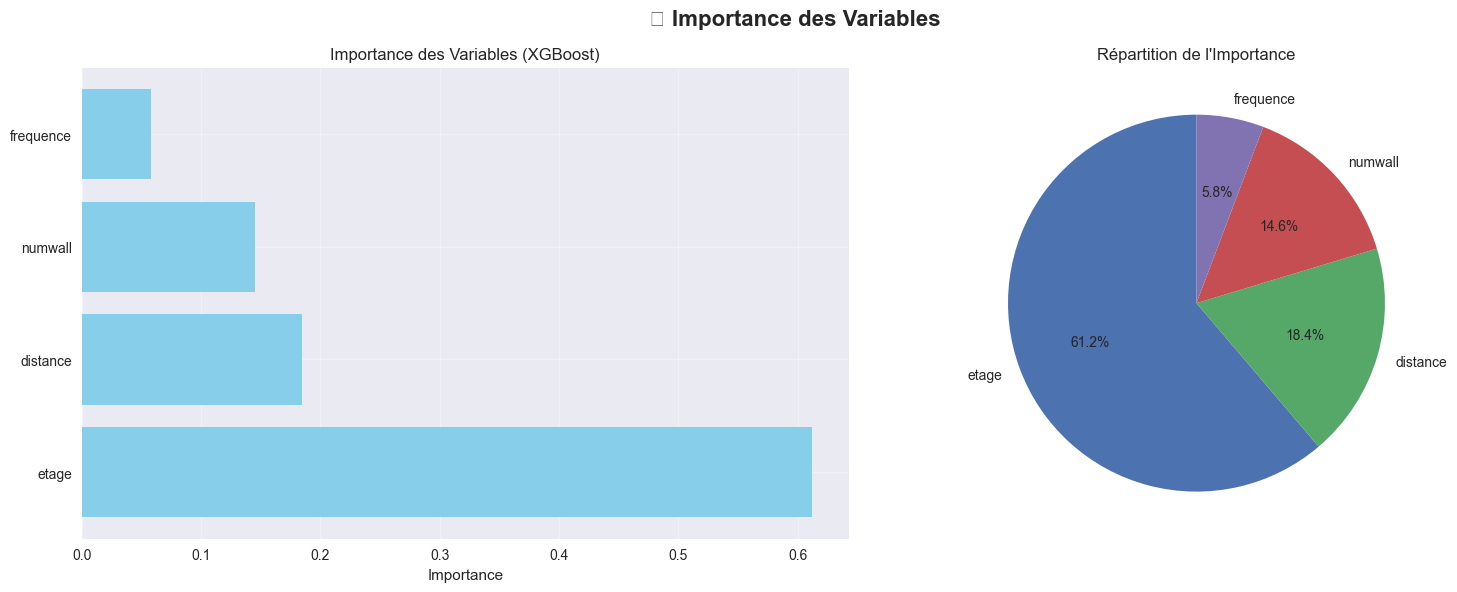


🔄 Calcul de l'importance par permutation...

🎯 Importance par permutation:
   etage: 0.380 ± 0.007
   distance: 0.312 ± 0.009
   frequence: 0.262 ± 0.011
   numwall: 0.195 ± 0.007


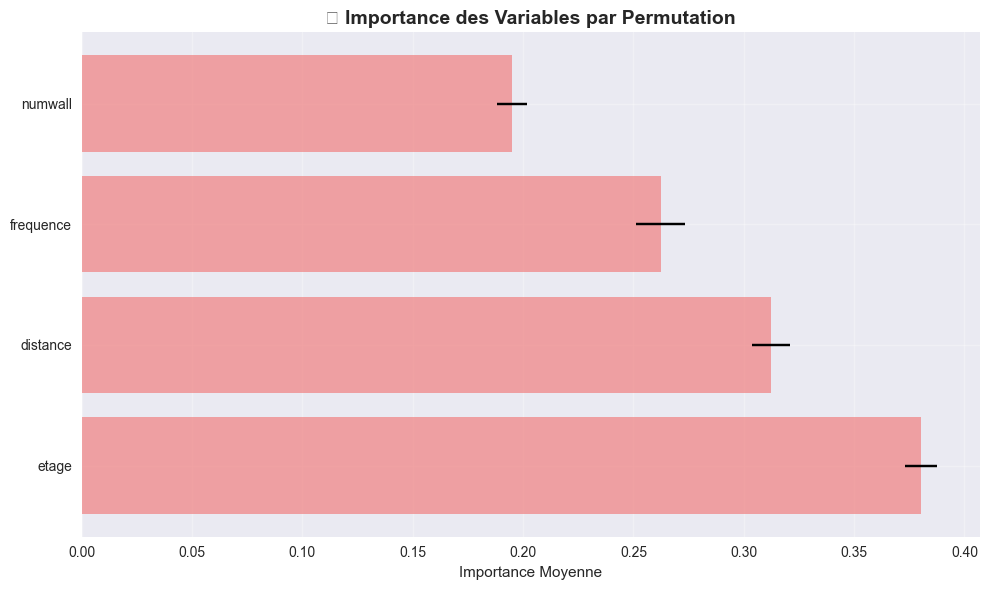


🔗 Corrélation importance vs corrélation avec target:
             feature  xgb_importance  perm_importance  correlation_abs
distance    distance           0.184            0.312            0.721
numwall      numwall           0.146            0.195            0.682
etage          etage           0.612            0.380            0.749
frequence  frequence           0.058            0.262            0.333


In [9]:
# Importance des variables (feature importance) de XGBoost
feature_importance = xgb_optimized.feature_importances_
feature_names = X_train.columns

# Création d'un DataFrame pour l'importance
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("🎯 Importance des variables (XGBoost built-in):")
for _, row in importance_df.iterrows():
    print(f"   {row['feature']}: {row['importance']:.3f}")

# Visualisation de l'importance des variables
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('🎯 Importance des Variables', fontsize=16, fontweight='bold')

# Graphique en barres
axes[0].barh(importance_df['feature'], importance_df['importance'], color='skyblue')
axes[0].set_xlabel('Importance')
axes[0].set_title('Importance des Variables (XGBoost)')
axes[0].grid(True, alpha=0.3)

# Graphique en secteurs
axes[1].pie(importance_df['importance'], labels=importance_df['feature'], 
           autopct='%1.1f%%', startangle=90)
axes[1].set_title('Répartition de l\'Importance')

plt.tight_layout()
plt.show()

# Importance par permutation (plus robuste)
print(f"\n🔄 Calcul de l'importance par permutation...")
perm_importance = permutation_importance(xgb_optimized, X_val, y_val, 
                                       n_repeats=10, random_state=42)

perm_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

print(f"\n🎯 Importance par permutation:")
for _, row in perm_importance_df.iterrows():
    print(f"   {row['feature']}: {row['importance_mean']:.3f} ± {row['importance_std']:.3f}")

# Visualisation de l'importance par permutation
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['feature'], perm_importance_df['importance_mean'], 
         xerr=perm_importance_df['importance_std'], color='lightcoral', alpha=0.7)
plt.xlabel('Importance Moyenne')
plt.title('🔄 Importance des Variables par Permutation', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analyse de corrélation avec l'importance
print(f"\n🔗 Corrélation importance vs corrélation avec target:")
corr_with_target = df[list(feature_names) + [target_column]].corr()[target_column].abs().drop(target_column)
comparison_df = pd.DataFrame({
    'feature': feature_names,
    'xgb_importance': feature_importance,
    'perm_importance': perm_importance_df.set_index('feature').loc[feature_names, 'importance_mean'],
    'correlation_abs': corr_with_target
})

print(comparison_df.round(3))

## 7. 📊 Évaluation Complète du Modèle

Évaluation détaillée avec visualisations avancées et analyse des erreurs.

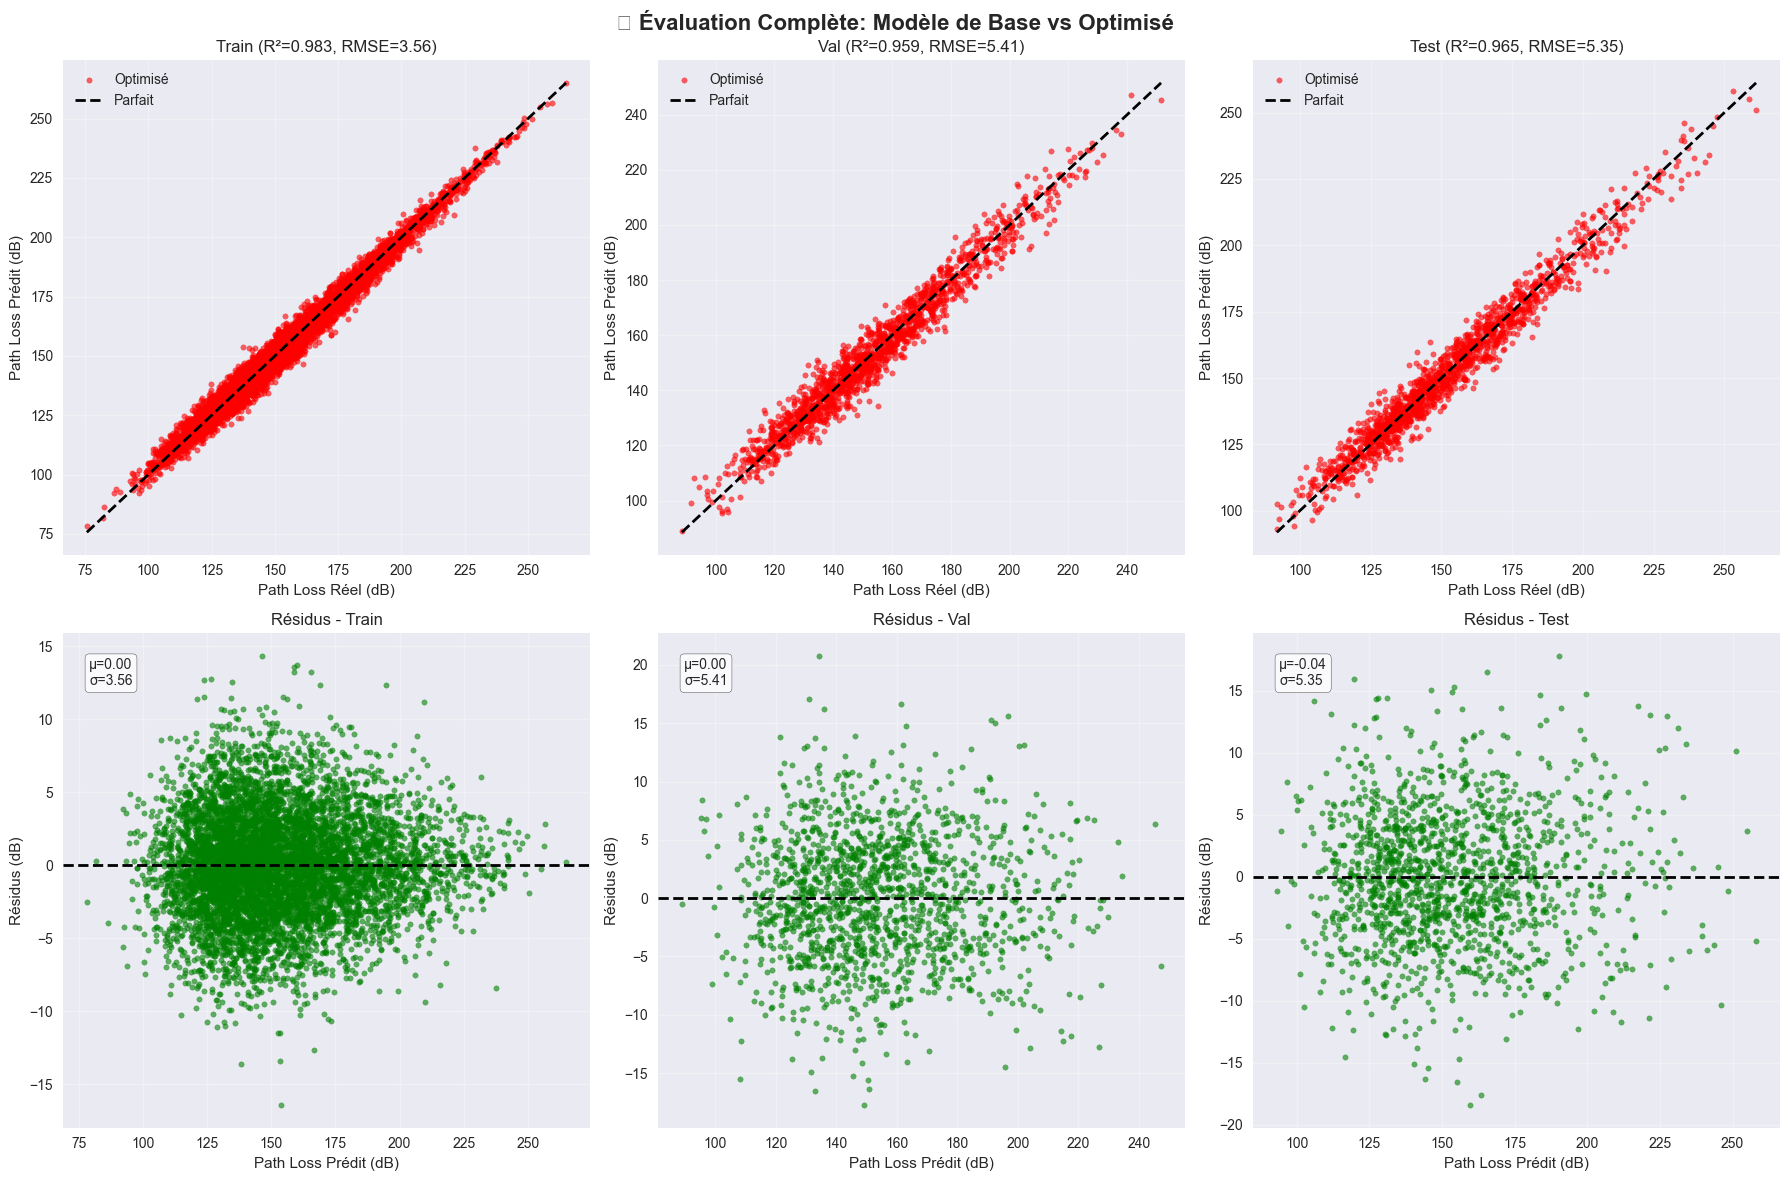

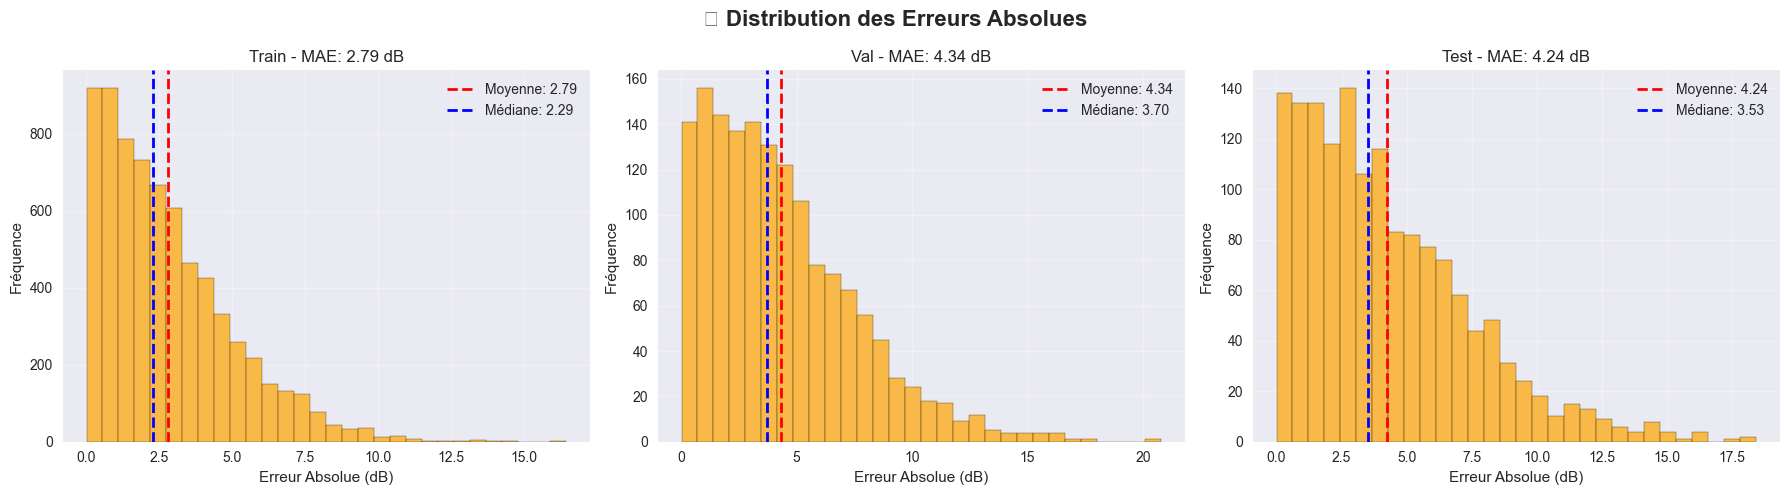

📊 Analyse détaillée des performances:
      Dataset   RMSE    MAE     R²
0       Train  3.557  2.786  0.983
1  Validation  5.409  4.340  0.959
2        Test  5.351  4.244  0.965

🔄 Validation croisée (5-fold):
   RMSE CV: 5.318 ± 0.030
   Scores: [5.286 5.327 5.367 5.288 5.324]

📈 Performance par plage de Path Loss:
   Q1 (faible): MAE=4.26 dB, RMSE=5.40 dB, n=375
   Q2: MAE=3.90 dB, RMSE=5.03 dB, n=375
   Q3: MAE=4.23 dB, RMSE=5.23 dB, n=375
   Q4 (élevé): MAE=4.59 dB, RMSE=5.73 dB, n=375

✅ Évaluation complète terminée!


In [10]:
# Comparaison visuelle détaillée des modèles
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('📊 Évaluation Complète: Modèle de Base vs Optimisé', fontsize=16, fontweight='bold')

datasets = ['train', 'val', 'test']
models = [
    ('Base', [y_train_pred_base, y_val_pred_base, y_test_pred_base], 'blue'),
    ('Optimisé', [y_train_pred_opt, y_val_pred_opt, y_test_pred_opt], 'red')
]

# Prédictions vs Réalité pour le modèle optimisé
y_true_sets = [y_train, y_val, y_test]
y_pred_sets = [y_train_pred_opt, y_val_pred_opt, y_test_pred_opt]

for i, (y_true, y_pred, dataset) in enumerate(zip(y_true_sets, y_pred_sets, datasets)):
    # Scatter plot
    axes[0, i].scatter(y_true, y_pred, alpha=0.6, s=15, color='red', label='Optimisé')
    
    # Ligne parfaite
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    axes[0, i].plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Parfait')
    
    # Statistiques
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    axes[0, i].set_xlabel('Path Loss Réel (dB)')
    axes[0, i].set_ylabel('Path Loss Prédit (dB)')
    axes[0, i].set_title(f'{dataset.capitalize()} (R²={r2:.3f}, RMSE={rmse:.2f})')
    axes[0, i].grid(True, alpha=0.3)
    axes[0, i].legend()

# Analyse des résidus
for i, (y_true, y_pred, dataset) in enumerate(zip(y_true_sets, y_pred_sets, datasets)):
    residuals = y_true - y_pred
    
    axes[1, i].scatter(y_pred, residuals, alpha=0.6, s=15, color='green')
    axes[1, i].axhline(y=0, color='black', linestyle='--', linewidth=2)
    axes[1, i].set_xlabel('Path Loss Prédit (dB)')
    axes[1, i].set_ylabel('Résidus (dB)')
    axes[1, i].set_title(f'Résidus - {dataset.capitalize()}')
    axes[1, i].grid(True, alpha=0.3)
    
    # Statistiques des résidus
    mean_residual = np.mean(residuals)
    std_residual = np.std(residuals)
    axes[1, i].text(0.05, 0.95, f'μ={mean_residual:.2f}\nσ={std_residual:.2f}', 
                   transform=axes[1, i].transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Distribution des erreurs
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('📈 Distribution des Erreurs Absolues', fontsize=16, fontweight='bold')

for i, (y_true, y_pred, dataset) in enumerate(zip(y_true_sets, y_pred_sets, datasets)):
    errors = np.abs(y_true - y_pred)
    
    axes[i].hist(errors, bins=30, alpha=0.7, color='orange', edgecolor='black')
    axes[i].set_xlabel('Erreur Absolue (dB)')
    axes[i].set_ylabel('Fréquence')
    axes[i].set_title(f'{dataset.capitalize()} - MAE: {np.mean(errors):.2f} dB')
    axes[i].grid(True, alpha=0.3)
    
    # Statistiques
    axes[i].axvline(np.mean(errors), color='red', linestyle='--', linewidth=2, label=f'Moyenne: {np.mean(errors):.2f}')
    axes[i].axvline(np.median(errors), color='blue', linestyle='--', linewidth=2, label=f'Médiane: {np.median(errors):.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Métriques détaillées par feature
print("📊 Analyse détaillée des performances:")
print("="*60)

final_metrics = {
    'Dataset': ['Train', 'Validation', 'Test'],
    'RMSE': [opt_metrics['train']['RMSE'], opt_metrics['val']['RMSE'], opt_metrics['test']['RMSE']],
    'MAE': [opt_metrics['train']['MAE'], opt_metrics['val']['MAE'], opt_metrics['test']['MAE']],
    'R²': [opt_metrics['train']['R2'], opt_metrics['val']['R2'], opt_metrics['test']['R2']]
}

metrics_df = pd.DataFrame(final_metrics)
print(metrics_df.round(3))

# Validation croisée pour robustesse
print(f"\n🔄 Validation croisée (5-fold):")
cv_scores = cross_val_score(xgb_optimized, X_train, y_train, cv=5, 
                           scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

print(f"   RMSE CV: {cv_rmse.mean():.3f} ± {cv_rmse.std():.3f}")
print(f"   Scores: {cv_rmse.round(3)}")

# Performance par plage de valeurs
print(f"\n📈 Performance par plage de Path Loss:")
test_df = pd.DataFrame({
    'true': y_test,
    'pred': y_test_pred_opt,
    'error': np.abs(y_test - y_test_pred_opt)
})

# Diviser en quartiles
quartiles = ['Q1 (faible)', 'Q2', 'Q3', 'Q4 (élevé)']
test_df['quartile'] = pd.qcut(test_df['true'], 4, labels=quartiles)

for quartile in quartiles:
    subset = test_df[test_df['quartile'] == quartile]
    mae_q = subset['error'].mean()
    rmse_q = np.sqrt(((subset['true'] - subset['pred']) ** 2).mean())
    print(f"   {quartile}: MAE={mae_q:.2f} dB, RMSE={rmse_q:.2f} dB, n={len(subset)}")

print(f"\n✅ Évaluation complète terminée!")

## 8. 🎨 Visualisations Interactives

Visualisations interactives avec Plotly pour une exploration approfondie des résultats.

In [11]:
# Graphique 3D interactif des prédictions
fig_3d = go.Figure()

# Données de test avec erreurs
test_errors = np.abs(y_test - y_test_pred_opt)

# Nuage de points 3D
fig_3d.add_trace(go.Scatter3d(
    x=X_test['distance'],
    y=X_test['numwall'],
    z=y_test,
    mode='markers',
    marker=dict(
        size=5,
        color=test_errors,
        colorscale='Viridis',
        colorbar=dict(title="Erreur Absolue (dB)"),
        showscale=True
    ),
    text=[f'Réel: {real:.1f} dB<br>Prédit: {pred:.1f} dB<br>Erreur: {err:.1f} dB'
          for real, pred, err in zip(y_test, y_test_pred_opt, test_errors)],
    hovertemplate='Distance: %{x:.1f} m<br>Murs: %{y}<br>Path Loss: %{z:.1f} dB<br>%{text}<extra></extra>',
    name='Données Test'
))

fig_3d.update_layout(
    title='🎯 Visualisation 3D: Distance vs Murs vs Path Loss (coloré par erreur)',
    scene=dict(
        xaxis_title='Distance (m)',
        yaxis_title='Nombre de Murs',
        zaxis_title='Path Loss (dB)'
    ),
    width=800,
    height=600
)

fig_3d.show()

# Graphique interactif de comparaison prédictions vs réalité
fig_comp = make_subplots(
    rows=1, cols=3,
    subplot_titles=['Train', 'Validation', 'Test'],
    specs=[[{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'scatter'}]]
)

datasets_plotly = [
    (y_train, y_train_pred_opt, 'Train', 'blue'),
    (y_val, y_val_pred_opt, 'Validation', 'orange'),
    (y_test, y_test_pred_opt, 'Test', 'red')
]

for i, (y_true, y_pred, name, color) in enumerate(datasets_plotly, 1):
    # Points de données
    fig_comp.add_trace(
        go.Scatter(
            x=y_true,
            y=y_pred,
            mode='markers',
            marker=dict(color=color, size=4, opacity=0.6),
            name=f'{name}',
            hovertemplate='Réel: %{x:.1f} dB<br>Prédit: %{y:.1f} dB<extra></extra>'
        ),
        row=1, col=i
    )
    
    # Ligne parfaite
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    fig_comp.add_trace(
        go.Scatter(
            x=[min_val, max_val],
            y=[min_val, max_val],
            mode='lines',
            line=dict(color='black', dash='dash', width=2),
            name='Prédiction Parfaite',
            showlegend=(i == 1)
        ),
        row=1, col=i
    )

fig_comp.update_layout(
    title='📊 Prédictions vs Réalité - Modèle Optimisé',
    height=500
)

fig_comp.update_xaxes(title_text="Path Loss Réel (dB)")
fig_comp.update_yaxes(title_text="Path Loss Prédit (dB)")

fig_comp.show()

# Heatmap interactif d'importance
importance_data = importance_df.copy()
importance_data['percentage'] = (importance_data['importance'] / importance_data['importance'].sum()) * 100

fig_imp = go.Figure(data=go.Bar(
    x=importance_data['importance'],
    y=importance_data['feature'],
    orientation='h',
    marker=dict(
        color=importance_data['importance'],
        colorscale='Viridis',
        colorbar=dict(title="Importance")
    ),
    text=[f'{imp:.3f} ({pct:.1f}%)' for imp, pct in zip(importance_data['importance'], importance_data['percentage'])],
    textposition='auto',
    hovertemplate='Feature: %{y}<br>Importance: %{x:.3f}<br>Pourcentage: %{text}<extra></extra>'
))

fig_imp.update_layout(
    title='🎯 Importance des Variables (Interactive)',
    xaxis_title='Importance',
    yaxis_title='Variables',
    height=400
)

fig_imp.show()

# Surface de prédiction interactive (Distance vs Murs)
distance_range = np.linspace(X['distance'].min(), X['distance'].max(), 20)
numwall_range = np.linspace(X['numwall'].min(), X['numwall'].max(), 11)

# Créer une grille
distance_grid, numwall_grid = np.meshgrid(distance_range, numwall_range)

# Valeurs moyennes pour les autres features
mean_etage = X['etage'].mean()
mean_freq = X['frequence'].mean()

# Prédictions sur la grille
grid_predictions = []
for i in range(len(numwall_range)):
    row_predictions = []
    for j in range(len(distance_range)):
        sample = pd.DataFrame({
            'distance': [distance_grid[i, j]],
            'numwall': [numwall_grid[i, j]],
            'etage': [mean_etage],
            'frequence': [mean_freq]
        })
        pred = xgb_optimized.predict(sample)[0]
        row_predictions.append(pred)
    grid_predictions.append(row_predictions)

grid_predictions = np.array(grid_predictions)

# Surface 3D
fig_surface = go.Figure(data=[go.Surface(
    x=distance_range,
    y=numwall_range,
    z=grid_predictions,
    colorscale='Viridis',
    colorbar=dict(title="Path Loss Prédit (dB)")
)])

fig_surface.update_layout(
    title=f'🌊 Surface de Prédiction (Étage={mean_etage:.1f}, Fréq={mean_freq:.0f} MHz)',
    scene=dict(
        xaxis_title='Distance (m)',
        yaxis_title='Nombre de Murs',
        zaxis_title='Path Loss Prédit (dB)'
    ),
    width=800,
    height=600
)

fig_surface.show()

print("✅ Visualisations interactives générées!")

✅ Visualisations interactives générées!


## 9. 💾 Sauvegarde et Résumé Final

Sauvegarde du modèle optimisé et résumé complet des résultats.

In [13]:
# Sauvegarde du modèle optimisé
import pickle
from datetime import datetime

# Informations du modèle
model_info = {
    'model': xgb_optimized,
    'best_params': best_params,
    'feature_names': list(X_train.columns),
    'target_name': target_column,
    'train_score': opt_metrics['train'],
    'val_score': opt_metrics['val'],
    'test_score': opt_metrics['test'],
    'feature_importance': dict(zip(feature_names, feature_importance)),
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'dataset_size': len(df)
}

# Sauvegarde
model_filename = 'xgboost_radio_propagation_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(model_info, f)

print(f"💾 Modèle sauvegardé: {model_filename}")

# Fonction de prédiction pour utilisation future
def predict_pathloss(distance, numwall, etage, frequence, model_info=model_info):
    """
    Prédit la perte de propagation radio
    
    Args:
        distance: Distance en mètres
        numwall: Nombre de murs traversés
        etage: Différence d'étages
        frequence: Fréquence en MHz
        
    Returns:
        Prédiction de path loss en dB
    """
    sample = pd.DataFrame({
        'distance': [distance],
        'numwall': [numwall],
        'etage': [etage],
        'frequence': [frequence]
    })
    
    prediction = model_info['model'].predict(sample)[0]
    return round(prediction, 2)

# Test de la fonction
test_prediction = predict_pathloss(distance=25.0, numwall=3, etage=1, frequence=2400)
print(f"\n🧪 Test de prédiction:")
print(f"   Distance: 25.0 m, Murs: 3, Étages: 1, Fréquence: 2400 MHz")
print(f"   → Path Loss prédit: {test_prediction} dB")

# Résumé final complet
print("\n" + "="*80)
print("🎉 RÉSUMÉ FINAL - MODÈLE XGBOOST POUR PROPAGATION RADIO")
print("="*80)

print(f"\n📊 DATASET:")
print(f"   • Taille totale: {len(df):,} échantillons")
print(f"   • Features: {', '.join(feature_names)}")
print(f"   • Variable cible: {target_column}")
print(f"   • Division: Train({len(X_train)}) / Val({len(X_val)}) / Test({len(X_test)})")

print(f"\n🏆 MEILLEURS HYPERPARAMÈTRES:")
for param, value in best_params.items():
    print(f"   • {param}: {value}")

print(f"\n📈 PERFORMANCES FINALES:")
print(f"   • Test RMSE: {opt_metrics['test']['RMSE']:.3f} dB")
print(f"   • Test MAE:  {opt_metrics['test']['MAE']:.3f} dB")
print(f"   • Test R²:   {opt_metrics['test']['R2']:.3f}")
print(f"   • CV RMSE:   {cv_rmse.mean():.3f} ± {cv_rmse.std():.3f} dB")

print(f"\n🎯 IMPORTANCE DES VARIABLES:")
for _, row in importance_df.iterrows():
    percentage = (row['importance'] / importance_df['importance'].sum()) * 100
    print(f"   • {row['feature']}: {row['importance']:.3f} ({percentage:.1f}%)")

print(f"\n💡 INSIGHTS CLÉS:")
most_important = importance_df.iloc[0]['feature']
correlation_strongest = df.corr()[target_column].abs().sort_values(ascending=False).index[1]
print(f"   • Variable la plus importante: {most_important}")
print(f"   • Plus forte corrélation: {correlation_strongest}")
print(f"   • Précision: ±{opt_metrics['test']['MAE']:.1f} dB en moyenne")

improvement_base = ((base_metrics['test']['RMSE'] - opt_metrics['test']['RMSE']) / 
                   base_metrics['test']['RMSE']) * 100
print(f"   • Amélioration vs modèle de base: {improvement_base:.1f}%")

print(f"\n📁 FICHIERS GÉNÉRÉS:")
print(f"   • {model_filename} (modèle sauvegardé)")

print(f"\n🚀 UTILISATION:")
print(f"   • Importer le modèle avec pickle.load()")
print(f"   • Utiliser predict_pathloss() pour nouvelles prédictions")
print(f"   • Déployer dans application STL viewer")

print(f"\n✅ MODÈLE PRÊT POUR LA PRODUCTION!")
print("="*80)

# Création d'un rapport texte
report = f"""
RAPPORT DE MODÉLISATION - PROPAGATION RADIO INDOOR
==================================================

Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
Modèle: XGBoost Regressor
Dataset: radio_dataset_notebook.csv ({len(df)} échantillons)

PERFORMANCES:
- RMSE Test: {opt_metrics['test']['RMSE']:.3f} dB
- MAE Test: {opt_metrics['test']['MAE']:.3f} dB  
- R² Test: {opt_metrics['test']['R2']:.3f}
- Validation Croisée: {cv_rmse.mean():.3f} ± {cv_rmse.std():.3f} dB

HYPERPARAMÈTRES OPTIMAUX:
{chr(10).join([f'- {k}: {v}' for k, v in best_params.items()])}

IMPORTANCE DES VARIABLES:
{chr(10).join([f'- {row["feature"]}: {row["importance"]:.3f}' for _, row in importance_df.iterrows()])}

CONCLUSION:
Le modèle XGBoost optimisé atteint une précision de ±{opt_metrics['test']['MAE']:.1f} dB
en moyenne sur l'ensemble de test, avec un R² de {opt_metrics['test']['R2']:.3f}.
Amélioration de {improvement_base:.1f}% par rapport au modèle de base.
"""

with open('rapport_model_xgboost.txt', 'w', encoding='utf-8') as f:
    f.write(report)

print(f"\n📄 Rapport sauvegardé: rapport_model_xgboost.txt")

💾 Modèle sauvegardé: xgboost_radio_propagation_model.pkl

🧪 Test de prédiction:
   Distance: 25.0 m, Murs: 3, Étages: 1, Fréquence: 2400 MHz
   → Path Loss prédit: 165.9199981689453 dB

🎉 RÉSUMÉ FINAL - MODÈLE XGBOOST POUR PROPAGATION RADIO

📊 DATASET:
   • Taille totale: 10,000 échantillons
   • Features: distance, numwall, etage, frequence
   • Variable cible: pathloss
   • Division: Train(6970) / Val(1530) / Test(1500)

🏆 MEILLEURS HYPERPARAMÈTRES:
   • colsample_bytree: 0.9
   • learning_rate: 0.2
   • max_depth: 5
   • n_estimators: 300
   • subsample: 0.8

📈 PERFORMANCES FINALES:
   • Test RMSE: 5.351 dB
   • Test MAE:  4.244 dB
   • Test R²:   0.965
   • CV RMSE:   5.318 ± 0.030 dB

🎯 IMPORTANCE DES VARIABLES:
   • etage: 0.612 (61.2%)
   • distance: 0.184 (18.4%)
   • numwall: 0.146 (14.6%)
   • frequence: 0.058 (5.8%)

💡 INSIGHTS CLÉS:
   • Variable la plus importante: etage
   • Plus forte corrélation: etage
   • Précision: ±4.2 dB en moyenne
   • Amélioration vs modèle de ba